In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

In [2]:
data = yf.download(tickers='^NDX', start = '2020-06-01',end = '2025-06-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.columns

MultiIndex([( 'Close', '^NDX'),
            (  'High', '^NDX'),
            (   'Low', '^NDX'),
            (  'Open', '^NDX'),
            ('Volume', '^NDX')],
           names=['Price', 'Ticker'])

In [4]:
data_original = data.copy()

In [5]:
data.columns = [f"{col[0]}" for col in data.columns]

In [6]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [106]:
data.to_csv('data_export.csv', index=False)

In [7]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

In [9]:
# Copy the 'Close' column and add it as a new column 'Adj Close'
data['Adj Close'] = data[('Close')]
data.head()

,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close
Date,,,,,,,,,,
2020-06-01,9598.889648,9609.379883,9515.339844,9526.429688,3847770000,NaN,NaN,NaN,NaN,9598.889648
2020-06-02,9657.309570,9660.080078,9511.879883,9603.179688,3990080000,100.000000,NaN,NaN,NaN,9657.309570
2020-06-03,9704.690430,9729.690430,9648.929688,9689.719727,4679030000,100.000000,NaN,NaN,NaN,9704.690430
2020-06-04,9629.660156,9741.969727,9577.709961,9672.169922,6141320000,92.026369,NaN,NaN,NaN,9629.660156
2020-06-05,9824.389648,9846.629883,9659.450195,9673.089844,6607730000,93.468196,NaN,NaN,NaN,9824.389648


In [10]:
data.shape

(1257, 10)

In [11]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'EMAF', 'EMAM', 'EMAS',
       'Adj Close'],
      dtype='object')

In [12]:
data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

C:\Users\PC\AppData\Local\Temp\ipykernel_4516\1580431170.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [13]:
data

,Close,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose
Date,,,,,,,,,,,,,
2020-06-01,9598.889648,9609.379883,9515.339844,9526.429688,3847770000,NaN,NaN,NaN,NaN,9598.889648,54.129883,1,9657.309570
2020-06-02,9657.309570,9660.080078,9511.879883,9603.179688,3990080000,100.000000,NaN,NaN,NaN,9657.309570,14.970703,1,9704.690430
2020-06-03,9704.690430,9729.690430,9648.929688,9689.719727,4679030000,100.000000,NaN,NaN,NaN,9704.690430,-42.509766,0,9629.660156
2020-06-04,9629.660156,9741.969727,9577.709961,9672.169922,6141320000,92.026369,NaN,NaN,NaN,9629.660156,151.299805,1,9824.389648
2020-06-05,9824.389648,9846.629883,9659.450195,9673.089844,6607730000,93.468196,NaN,NaN,NaN,9824.389648,95.829102,1,9901.519531
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,20915.660156,21025.580078,20777.970703,20806.369141,8730370000,59.462462,20564.425354,20170.049768,20124.241863,20915.660156,213.541016,1,21414.990234
2025-05-27,21414.990234,21429.320312,21145.130859,21201.449219,8927760000,64.691944,20645.431533,20194.702054,20141.337868,21414.990234,-133.519531,0,21318.169922
2025-05-28,21318.169922,21508.080078,21296.509766,21451.689453,8087530000,63.010729,20709.501856,20216.948942,20156.925048,21318.169922,-247.589844,0,21363.949219


In [42]:
data.tail(10)

,Date,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose
1097,2025-05-15,21443.880859,21168.169922,21206.730469,10546350000,68.245350,20047.190410,20036.344313,20032.906710,21335.820312,52.308594,1,21427.939453
1098,2025-05-16,21428.789062,21246.419922,21375.630859,10509820000,68.943002,20178.690319,20063.900652,20051.383965,21427.939453,308.919922,1,21447.050781
1099,2025-05-19,21464.560547,21138.130859,21138.130859,13080030000,69.093266,20299.486554,20091.289764,20069.869618,21447.050781,19.738281,1,21367.369141
1100,2025-05-20,21399.990234,21226.660156,21347.630859,9047100000,67.637871,20401.189657,20116.558662,20087.055042,21367.369141,-136.951172,0,21080.359375
1101,2025-05-21,21482.980469,21002.099609,21217.310547,11112460000,62.573745,20465.872487,20135.643825,20100.211391,21080.359375,15.009766,1,21112.470703
1102,2025-05-22,21263.179688,21046.220703,21097.460938,8289710000,62.905195,20527.453270,20154.986931,20113.618799,21112.470703,109.291016,1,20915.660156
1103,2025-05-23,21025.580078,20777.970703,20806.369141,8730370000,59.462462,20564.425354,20170.049768,20124.241863,20915.660156,213.541016,1,21414.990234
1104,2025-05-27,21429.320312,21145.130859,21201.449219,8927760000,64.691944,20645.431533,20194.702054,20141.337868,21414.990234,-133.519531,0,21318.169922
1105,2025-05-28,21508.080078,21296.509766,21451.689453,8087530000,63.010729,20709.501856,20216.948942,20156.925048,21318.169922,-247.589844,0,21363.949219
1106,2025-05-29,21611.539062,21260.730469,21611.539062,11016850000,63.489276,20771.830176,20239.661819,20172.912123,21363.949219,10.140625,1,21340.990234


In [14]:
data.dropna(inplace=True)


In [16]:
data.reset_index(inplace = True)


In [18]:
data.drop(['Close'], axis=1, inplace=True)

In [20]:
data.shape

(1107, 13)

In [7]:
df_sentiment = pd.read_csv('df_with_sentiment_finbert.csv')
df_sentiment.head()

,Date,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose,ndx_sentiment_score
0,2020-12-31,12904.089844,12804.750000,12852.959961,4815840000,68.107248,12619.799172,11782.359256,11337.329980,12888.280273,-255.559570,0,12694.660156,0.0
1,2021-01-04,12950.219727,12537.419922,12950.219727,6636170000,58.263145,12626.928789,11800.424620,11355.307864,12694.660156,139.250000,1,12802.379883,0.0
2,2021-01-05,12809.669922,12663.129883,12663.129883,6971860000,61.560279,12643.638417,11820.265319,11374.474380,12802.379883,22.089844,1,12623.349609,0.0
3,2021-01-06,12803.290039,12569.419922,12601.259766,7689880000,53.997973,12641.706150,11836.167978,11391.015774,12623.349609,194.160156,1,12939.570312,0.0
4,2021-01-07,12966.679688,12744.820312,12745.410156,6841480000,62.643838,12670.074165,11858.017529,11411.526430,12939.570312,67.959961,1,13105.200195,0.0


In [10]:
df_sentiment = df_sentiment[df_sentiment['ndx_sentiment_score'] != 0].reset_index(drop=True)

In [12]:
df_sentiment = df_sentiment.iloc[1:]

In [15]:
df_sentiment

,Date,High,Low,Open,Volume,RSI,EMAF,EMAM,EMAS,Adj Close,Target,TargetClass,TargetNextClose,ndx_sentiment_score
1,2025-04-24,19224.800781,18744.470703,18756.529297,7607400000,51.406632,18745.834042,19976.245029,19997.992475,19214.400391,222.839844,1,19432.560547,-0.513514
2,2025-04-25,19447.560547,19133.230469,19209.720703,7412930000,53.096128,18811.236566,19965.478999,19990.503310,19432.560547,-5.431641,0,19427.289062,0.142857
3,2025-04-28,19519.330078,19162.460938,19432.720703,10313290000,53.048590,18869.908233,19954.821773,19983.043519,19427.289062,229.000000,1,19544.949219,-0.062500
4,2025-04-29,19582.769531,19304.830078,19315.949219,13001930000,54.028511,18934.197850,19946.705485,19977.240945,19544.949219,402.929688,1,19571.019531,0.142857
5,2025-05-01,20024.480469,19763.140625,19866.830078,8409690000,56.153497,19070.263097,19936.245263,19969.408217,19786.710938,116.000000,1,20102.609375,0.600000
6,2025-05-02,20176.599609,19936.669922,19986.609375,8180190000,58.824255,19168.581790,19939.539602,19971.172470,20102.609375,39.119141,1,19967.939453,0.333333
7,2025-05-05,20100.609375,19899.279297,19928.820312,7075320000,57.238842,19244.711091,19940.101975,19971.129649,19967.939453,81.708984,1,19791.349609,0.250000
8,2025-05-06,19927.230469,19659.320312,19709.640625,6958220000,55.159482,19296.771902,19937.156384,19968.748456,19791.349609,63.470703,1,19867.970703,0.125000
9,2025-05-07,19960.859375,19605.070312,19804.500000,7977870000,55.900928,19351.171788,19935.786371,19967.413652,19867.970703,-3.869141,0,20063.560547,0.210526
10,2025-05-08,20249.759766,19907.669922,20067.429688,8500390000,57.800866,19419.018337,19938.316552,19968.687121,20063.560547,-108.919922,0,20061.449219,0.357143


C:\Users\PC\AppData\Local\Temp\ipykernel_13580\449344010.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['SentimentPolarity'] = df_sentiment['ndx_sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative')


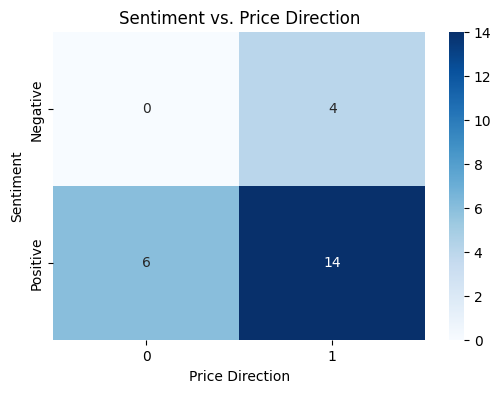

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert sentiment score to binary polarity
df_sentiment['SentimentPolarity'] = df_sentiment['ndx_sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Create confusion-style table
conf_matrix = pd.crosstab(df_sentiment['SentimentPolarity'], df_sentiment['TargetClass'], rownames=['Sentiment'], colnames=['Price Direction'])

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Sentiment vs. Price Direction')
plt.show()


In [52]:
X=[]
backcandles=60
print(data.shape[0])

1107


In [53]:
feature_columns = ['High', 'Low', 'Open', 'Volume', 'RSI', 'EMAF', 'EMAM', 'EMAS']
X = data[feature_columns]


In [54]:
dates = data['Date'][backcandles:].reset_index(drop=True)


In [58]:
data.columns

Index(['Date', 'High', 'Low', 'Open', 'Volume', 'RSI', 'EMAF', 'EMAM', 'EMAS',
       'Adj Close', 'Target', 'TargetClass', 'TargetNextClose'],
      dtype='object')

In [94]:
target_column = 'TargetClass'

In [95]:
X = []
for j in range(len(feature_columns)):  # for each feature/column
    X.append([])
    for i in range(backcandles, len(data)):
        X[j].append(data[feature_columns].iloc[i-backcandles:i, j].values)

In [96]:
X = np.moveaxis(X, [0], [2])  # Shape: (samples, backcandles, features)

In [97]:
yi = data[target_column].values[backcandles:]
y = np.reshape(yi, (len(yi), 1))

In [98]:
print("X shape:", X.shape)  # Should be (rows - backcandles, backcandles, num_features)
print("y shape:", y.shape)  # Should be (rows - backcandles, 1)

X shape: (1047, 60, 8)
y shape: (1047, 1)


In [99]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming X, y already created as before
splitlimit = int(len(X) * 0.8)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]

# Reshape X from 3D to 2D: (samples, time, features) -> (samples * time, features)
X_train_2d = X_train.reshape(-1, X_train.shape[2])
scaler_X_train = MinMaxScaler()
X_train_scaled_2d = scaler_X_train.fit_transform(X_train_2d)
X_train_scaled = X_train_scaled_2d.reshape(X_train.shape)


# 2) Scale X_test using the SAME scaler
X_test_2d = X_test.reshape(-1, X_test.shape[2])
X_test_scaled_2d = scaler_X_train.transform(X_test_2d)
X_test_scaled = X_test_scaled_2d.reshape(X_test.shape)

# 3) Scale y_train
scaler_y_train = MinMaxScaler()
y_train_scaled = scaler_y_train.fit_transform(y_train)


# 4) Scale y_test using SAME scaler_y_train
y_test_scaled = scaler_y_train.transform(y_test)


# Final output
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)
print("y_train_scaled:", y_train_scaled)


X_train_scaled shape: (837, 60, 8)
y_train_scaled shape: (837, 1)
y_train_scaled: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]


In [100]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train_scaled, y=y_train_scaled, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)


Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3116 - val_loss: 0.2487
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2573 - val_loss: 0.2496
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2552 - val_loss: 0.2517
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2552 - val_loss: 0.2542
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2542 - val_loss: 0.2476
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2495 - val_loss: 0.2473
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2475 - val_loss: 0.2512
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2492 - val_loss: 0.2502
Epoch 9/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2553 - val_loss: 0.2505
Epoch 10/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2511 - val_loss: 0.2502
Epoch 11/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2509 - val_loss: 0.2571
Epoch 12/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2503 - v

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss=Huber())

In [104]:
y_pred_scaled = model.predict(X_test_scaled)
# 7) Inverse scale predictions back to original scale
y_pred = scaler_y_train.inverse_transform(y_pred_scaled)

# 8) Compare predictions and true y_test (unscaled)
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Predicted: [0.45636263], Actual: [0]
Predicted: [0.42655823], Actual: [1]
Predicted: [0.45382962], Actual: [0]
Predicted: [0.44632065], Actual: [0]
Predicted: [0.48005268], Actual: [1]
Predicted: [0.49984893], Actual: [1]
Predicted: [0.5419594], Actual: [0]
Predicted: [0.49460882], Actual: [1]
Predicted: [0.48386875], Actual: [1]
Predicted: [0.45408475], Actual: [0]


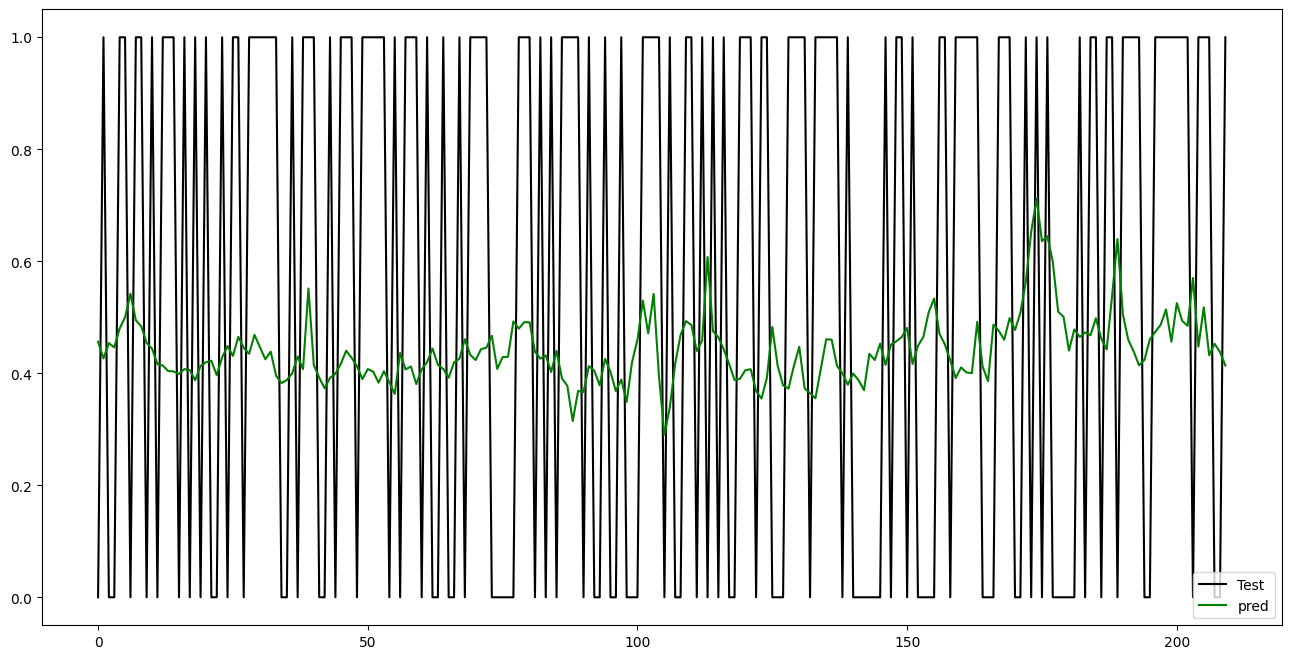

In [102]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R^2 Score: {r2:.6f}")


Mean Squared Error (MSE): 0.265427
Root Mean Squared Error (RMSE): 0.515196
Mean Absolute Error (MAE): 0.508457
R^2 Score: -0.080924
